<a href="https://colab.research.google.com/github/thdelusions/PrimeiroRep/blob/main/note_rna_theodora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TensorFlow version: 2.17.0
As raízes da equação são: x1 = 2.50, x2 = -1.00
Entradas: [-50.       -49.979996 -49.959992 ...  49.959992  49.979996  50.      ]

Saídas: [5145.         5140.93998816 5136.88157696 ... 4837.12162497 4841.06001216
 4845.        ]


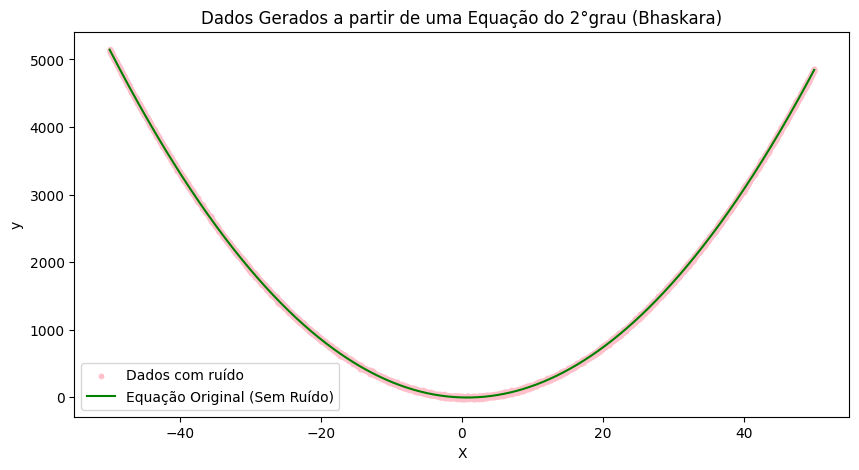

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3957497.0000 - val_loss: 316824.3750
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 351533.6562 - val_loss: 305233.6875
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 340074.0625 - val_loss: 290376.1562
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321856.6562 - val_loss: 274669.8750
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 300492.8750 - val_loss: 260415.4375
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274430.5312 - val_loss: 252494.8594
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 271041.0625 - val_loss: 224596.4219
Epoch 8/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249244.8125 - val_loss: 228807.0156
Epoch 9/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 219166.0000 - val_loss: 184049.3438
Epoch 10/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 199809.7344 - val_loss: 161279.0625
Epoch 11/300
100/100 ━━━━━━━━━━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Erro Médio Quadrático (MSE): 1039.94


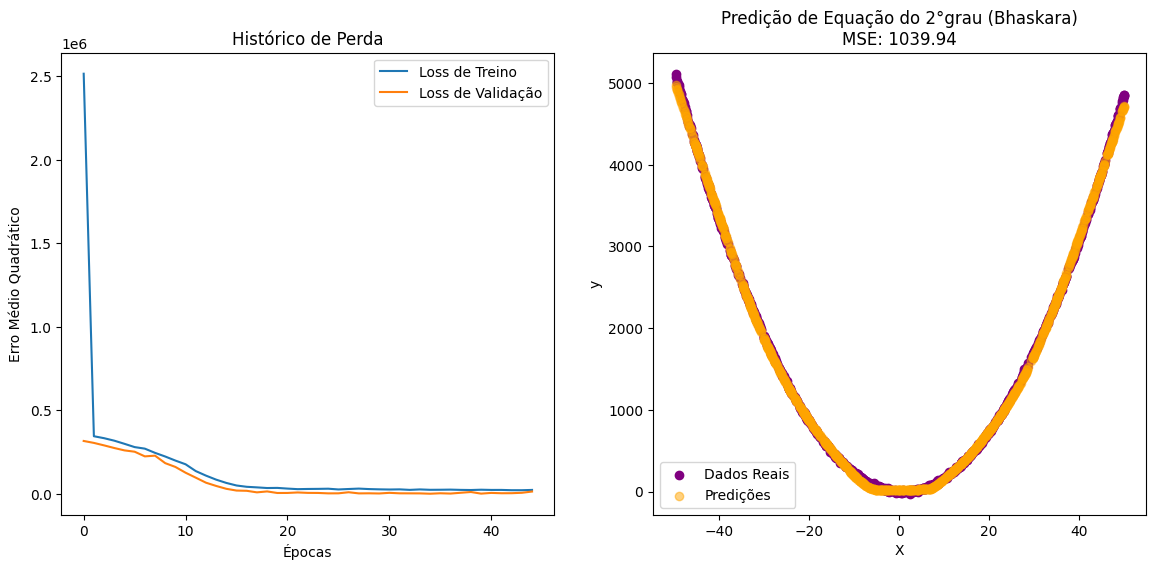

In [26]:
#importando as bibliotecas necessarias

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

#coeficientes da eq

a = 2.0
b = -3.0
c = -5.0

#definindo uma fç p calcular as raizes por Bhaskara
def calcular_bhaskara(a, b, c):
    delta = b**2 - 4 * a * c
    if delta < 0:
        return None  # Sem raízes reais
    x1 = (-b + np.sqrt(delta)) / (2 * a)
    x2 = (-b - np.sqrt(delta)) / (2 * a)
    return x1, x2

#calculando
raizes = calcular_bhaskara(a, b, c)
if raizes:
    print(f"As raízes da equação são: x1 = {raizes[0]:.2f}, x2 = {raizes[1]:.2f}")
else:
    print("A equação não possui raízes reais.")

#geração de valores de X
X = np.linspace(-50, 50, 5000)
y = a * X**2 + b * X + c

print('Entradas:', X)
print('\nSaídas:', y)

#variacoes aos dados
noise = np.random.normal(0, 10, X.shape)
y_noisy = y + noise

#grafico
plt.figure(figsize=(10, 5))
plt.scatter(X, y_noisy, s=10, label="Dados com ruído", color="pink")
plt.plot(X, y, color="green", label="Equação Original (Sem Ruído)")
plt.title("Dados Gerados a partir de uma Equação do 2°grau (Bhaskara)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#divisao dos dados a serem treinados
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=73)

#modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='nadam', loss='mean_squared_error')

# Early Stopping para evitar overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, callbacks=[early_stopping], verbose=1)


#avaliando o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Erro Médio Quadrático (MSE): {mse:.2f}")
plt.figure(figsize=(14, 6))

#histórico de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss de Treino')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Histórico de Perda')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Quadrático')
plt.legend()

#resultado da predicao
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='purple', label='Dados Reais')
plt.scatter(X_test, y_pred, color='orange', alpha=0.5, label='Predições')
plt.title(f'Predição de Equação do 2°grau (Bhaskara)\nMSE: {mse:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
